In [62]:
import docplex.mp.model as cpx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [63]:
#For plotting
cm = sns.light_palette("green", as_cmap=True)

th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

td_props = [
  ('font-size', '11px')
  ]

styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  ]

In [64]:
# Part A
#Conducting Sensitivity Analysis Based on Hours Required to Build
test_ff = [6*.9, 6, 6*1.1]
test_cc = [10*.9, 10, 10*1.1]

# Create matrix to store various profit values
obj_df = pd.DataFrame()

for i in range(3):
    for j in range(3):
        ff_lh = test_ff[i]
        cc_lh = test_cc[j]
        
        # Define Model
        mdl_a = cpx.Model("SM Profit Maximization")

        #Define Varaibles
        x1 = mdl_a.integer_var(name = "ft")
        x2 = mdl_a.integer_var(name = "cc", ub = 3500)

        #Define Constraints
        mdl_a.add_constraint(ff_lh*x1 + cc_lh*x2 <= 48000, ctname = "Labor Hours")
        mdl_a.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

        #Define Objective
        mdl_a.maximize(3600*x1 + 5400*x2)

        #solving the model
        s = mdl_a.solve()
        
        #Save the profit
        obj_df = obj_df.append(pd.DataFrame({'FT Hours': ff_lh, 'CC Hours': cc_lh, 'Profit' : s.get_objective_value()}, index=[0]), ignore_index=True)

obj_df = obj_df[['FT Hours','CC Hours', 'Profit']]
(obj_df.style
  .background_gradient(cmap=cm, subset=['Profit'])
  .set_caption('Varying Labor Hours for CC and FT')
  .set_table_styles(styles))



,FT Hours,CC Hours,Profit
0,5.4,9,29998800
1,5.4,10,28355400
2,5.4,11,27108000
3,6,9,28800000
4,6,10,27255600
5,6,11,26100000
6,6.6,9,27900000
7,6.6,10,26058600
8,6.6,11,25012800


Text(0.5, 1.08, 'Change in Profit due to Change in FT and CC Hours')

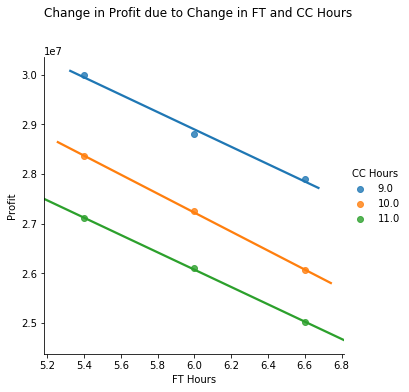

In [65]:
g = sns.lmplot(x='FT Hours', y='Profit', data=obj_df, hue='CC Hours', ci = None)
g.fig.suptitle("Change in Profit due to Change in FT and CC Hours", y=1.08) 

In [66]:
# Part B
#Conducting Sensitivity Analysis Based on Change in CC Demand
demand_delta = np.linspace(.05,.45 , num=9)

# Create matrix to store various profit values
obj_df = pd.DataFrame()

for i in range(len(demand_delta)):
    # Define Model
    mdl_b = cpx.Model("SM Profit Maximization")
    
    #Define Varaibles
    pct_inc = demand_delta[i]
    x1 = mdl_b.integer_var(name = "ft")
    x2 = mdl_b.integer_var(name = "cc", ub = 3500*(1+pct_inc))

    #Define Constraints
    mdl_b.add_constraint(6*x1 + 10.5*x2 <= 48000, ctname = "Labor Hours")
    mdl_b.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

    #Define Objective
    mdl_b.maximize(3600*x1 + 5400*x2 - 500000)

    #solving the model
    s = mdl_b.solve()
    
    #Save the profit
    obj_df = obj_df.append(pd.DataFrame({'Change in CC Demand': pct_inc,'Profit' : s.get_objective_value()}, index=[0]), ignore_index=True)
    
obj_df = obj_df[['Change in CC Demand', 'Profit']]
(obj_df.style
  .background_gradient(cmap=cm, subset=['Profit'])
  .set_caption('Varying Change in CC Demand')
  .set_table_styles(styles))

,Change in CC Demand,Profit
0,0.05,26140000
1,0.1,26140000
2,0.15,26140000
3,0.2,26140000
4,0.25,26140000
5,0.3,26140000
6,0.35,26140000
7,0.4,26140000
8,0.45,26140000


In [67]:
# Part C
#Conducting Sensitivity Analysis Based on Change in OT Available
labor_delta = np.linspace(.05,.45 , num=9)

# Create matrix to store various profit values
obj_df = pd.DataFrame()

for i in range(len(demand_delta)):
    # Define Model
    mdl_c = cpx.Model("SM Profit Maximization")

    #Define Varaibles
    pct_inc = labor_delta[i]
    x1 = mdl_c.integer_var(name = "ft")
    x2 = mdl_c.integer_var(name = "cc", ub = 3500)
    x3 = mdl_c.integer_var(name = "ot", ub = pct_inc*48000)

    #Define Constraints
    mdl_c.add_constraint(6*x1 + 10.5*x2 <= 48000 + x3, ctname = "Labor Hours")
    mdl_c.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

    #Define Objective
    mdl_c.maximize(3600*x1 + 5400*x2)

    #solving the model
    s = mdl_c.solve()
    
    #Save the profit
    obj_df = obj_df.append(pd.DataFrame({'Change in OT Avail': pct_inc,'Profit' : s.get_objective_value()}, index=[0]), ignore_index=True)
    
obj_df = obj_df[['Change in OT Avail', 'Profit']]
(obj_df.style
  .background_gradient(cmap=cm, subset=['Profit'])
  .set_caption('Varying Change in OT Avail')
  .set_table_styles(styles))

,Change in OT Avail,Profit
0,0.05,27792000
1,0.1,28944000
2,0.15,30096000
3,0.2,30600000
4,0.25,30600000
5,0.3,30600000
6,0.35,30600000
7,0.4,30600000
8,0.45,30600000


Text(0, 0.5, 'Total Profit')

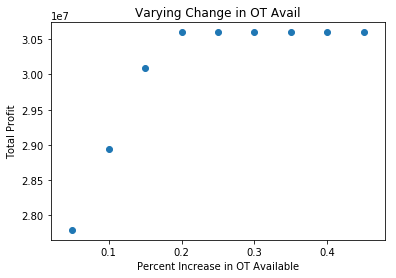

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(obj_df['Change in OT Avail'], obj_df['Profit'])
ax.set_title("Varying Change in OT Avail")
ax.set_xlabel("Percent Increase in OT Available")
ax.set_ylabel("Total Profit")

In [69]:
# Part D
# Answer should be difference in profit generated with new condition and old condition
# labor_delta = np.linspace(.05,.45 , num=9)

# # Create matrix to store various profit values
# obj_df = pd.DataFrame()

# for i in range(len(demand_delta)):
#     # Define Model
#     mdl_d = cpx.Model("SM Profit Maximization")

#     #Define Varaibles
#     price_ot =
#     x1 = mdl_d.integer_var(name = "ft")
#     x2 = mdl_d.integer_var(name = "cc", ub = 3500)
#     x3 = mdl_d.integer_var(name = "ot", ub = 12000 )
#     x4 = mdl_d.integer_var(name = "price_ot")

#     #Define Constraints
#     mdl_d.add_constraint(6*x1 + 10.5*x2 <= 48000 + x3, ctname = "Labor Hours")
#     mdl_d.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")
#     mdl_d.add_constraint(3600*x1 + 5400*x2 - x3*x4 >= 2.664e+07 , ctname = "Breakeven")

#     #Define Objective
#     mdl_d.minimize(x4)

#     #solving the model
#     s = mdl_d.solve()

In [70]:
# Part E
#Conducting Sensitivity Analysis Based on Change in OT Avail and Change in CC Demand
labor_delta = [.2, .25, .3]
demand_delta = [.15, .2, .25]

# Create matrix to store various profit values
obj_df = pd.DataFrame()


for i in range(3):
    for j in range(3):
        # Define Model
        mdl_e = cpx.Model("SM Profit Maximization")

        #Define Varaibles
        pct_inc_d  = demand_delta[i]
        pct_inc_l = labor_delta[j]
        x1 = mdl_e.integer_var(name = "ft")
        x2 = mdl_e.integer_var(name = "cc", ub = 3500*(1+pct_inc_d))
        x3 = mdl_e.integer_var(name = "ot", ub = pct_inc_l*48000 )

        #Define Constraints
        mdl_e.add_constraint(6*x1 + 10.5*x2 <= 48000 + x3, ctname = "Labor Hours")
        mdl_e.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

        #Define Objective
        mdl_e.maximize(3600*x1 + 5400*x2 - 500000)

        #solving the model
        s = mdl_e.solve()
        
        #Save the profit
        obj_df = obj_df.append(pd.DataFrame({'Change in OT Avail': pct_inc_l, 'Change In CC Demand': pct_inc_d, 'Profit' : s.get_objective_value(), 'Ads': 1, 'OT': 1}, index=[0]), ignore_index=True)

        ########################################################################################################################

        #Without Ads, With OT
        # Define Model
        mdl_e = cpx.Model("SM Profit Maximization")

        #Define Varaibles
        x1 = mdl_e.integer_var(name = "ft")
        x2 = mdl_e.integer_var(name = "cc", ub = 3500)
        x3 = mdl_e.integer_var(name = "ot", ub = pct_inc_l*48000 )

        #Define Constraints
        mdl_e.add_constraint(6*x1 + 10.5*x2 <= 48000 + x3, ctname = "Labor Hours")
        mdl_e.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

        #Define Objective
        mdl_e.maximize(3600*x1 + 5400*x2)

        #solving the model
        s = mdl_e.solve()
        
        #Save the profit
        obj_df = obj_df.append(pd.DataFrame({'Change in OT Avail': pct_inc_l, 'Change In CC Demand': pct_inc_d, 'Profit' : s.get_objective_value(), 'Ads': 0, 'OT': 1}, index=[0]), ignore_index=True)


        ########################################################################################################################

        #With Ads, Without OT
        # Define Model
        mdl_e = cpx.Model("SM Profit Maximization")

        #Define Varaibles
        x1 = mdl_e.integer_var(name = "ft")
        x2 = mdl_e.integer_var(name = "cc", ub = 3500*(1+pct_inc_d))
        x3 = mdl_e.integer_var(name = "ot", ub = 0 )

        #Define Constraints
        mdl_e.add_constraint(6*x1 + 10.5*x2 <= 48000 + x3, ctname = "Labor Hours")
        mdl_e.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

        #Define Objective
        mdl_e.maximize(3600*x1 + 5400*x2 - 500000)

        #solving the model
        s = mdl_e.solve()

        #Save the profit
        obj_df = obj_df.append(pd.DataFrame({'Change in OT Avail': pct_inc_l, 'Change In CC Demand': pct_inc_d, 'Profit' : s.get_objective_value(), 'Ads': 1, 'OT': 0}, index=[0]), ignore_index=True)


        ########################################################################################################################

        #Without Ads, Without OT
        # Define Model
        mdl_e = cpx.Model("SM Profit Maximization")

        #Define Varaibles
        x1 = mdl_e.integer_var(name = "ft")
        x2 = mdl_e.integer_var(name = "cc", ub = 3500)
        x3 = mdl_e.integer_var(name = "ot", ub = 0 )

        #Define Constraints
        mdl_e.add_constraint(6*x1 + 10.5*x2 <= 48000 + x3, ctname = "Labor Hours")
        mdl_e.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

        #Define Objective
        mdl_e.maximize(3600*x1 + 5400*x2)

        #solving the model
        s = mdl_e.solve()
        
        #Save the profit
        obj_df = obj_df.append(pd.DataFrame({'Change in OT Avail': pct_inc_l, 'Change In CC Demand': pct_inc_d, 'Profit' : s.get_objective_value(), 'Ads': 0, 'OT': 0}, index=[0]), ignore_index=True)


obj_df = obj_df[['Change in OT Avail','Change In CC Demand', 'Ads', 'OT', 'Profit']]
(obj_df.style
  .background_gradient(cmap=cm, subset=['Profit'])
  .set_caption('Varying Change in OT Avail, Change in CC Demand, Ads, and OT')
  .set_table_styles(styles))


,Change in OT Avail,Change In CC Demand,Ads,OT,Profit
0,0.2,0.15,1,1,30748000
1,0.2,0.15,0,1,30600000
2,0.2,0.15,1,0,26140000
3,0.2,0.15,0,0,26640000
4,0.25,0.15,1,1,31900000
5,0.25,0.15,0,1,30600000
6,0.25,0.15,1,0,26140000
7,0.25,0.15,0,0,26640000
8,0.3,0.15,1,1,31988200
9,0.3,0.15,0,1,30600000


Text(0.5, -0.01, 'It appears that there is only 1 line in some subplots because these values are all the same.')

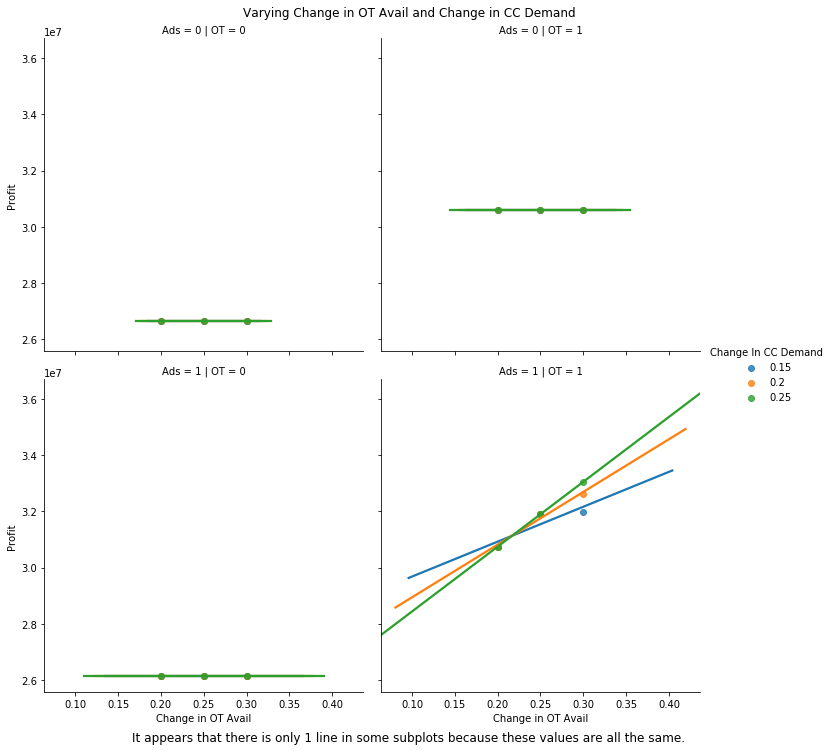

In [71]:
g = sns.lmplot(x='Change in OT Avail', y='Profit', row = 'Ads', col = 'OT', data=obj_df, hue='Change In CC Demand', ci = None)
fig = g.fig
fig.suptitle("Varying Change in OT Avail and Change in CC Demand", y = 1.01)
txt = "It appears that there is only 1 line in some subplots because these values are all the same."
plt.figtext(0.5, -.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

In [72]:
# Part F
#Conducting Sensitivity Analysis Based on Hours Required to Build
test_ff = [6*.9, 6, 6*1.1]
test_cc = [10*.9, 10, 10*1.1]

# Create matrix to store various profit values
obj_df = pd.DataFrame()

for i in range(3):
    for j in range(3):
        ff_lh = test_ff[i]
        cc_lh = int(test_cc[j])
        
        #With Ads, With OT
        # Define Model
        mdl_f = cpx.Model("SM Profit Maximization")

        #Define Varaibles
        x1 = mdl_f.integer_var(name = "ft")
        x2 = mdl_f.integer_var(name = "cc", ub = 3500*1.2)
        x3 = mdl_f.integer_var(name = "ot", ub = 12000 )
        ot_price = 1600000/12000

        #Define Constraints
        mdl_f.add_constraint(ff_lh*x1 + cc_lh*x2 <= 48000 + x3, ctname = "Labor Hours")
        mdl_f.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

        #Define Objective
        mdl_f.maximize(3600*x1 + 5400*x2 - ot_price*x3 -500000)

        #solving the model
        s = mdl_f.solve()
        
        #Save the profit
        obj_df = obj_df.append(pd.DataFrame({'FT Hours': ff_lh, 'CC Hours': cc_lh, 'Profit' : s.get_objective_value(), 'Ads': 1, 'OT': 1}, index=[0]), ignore_index=True)


        ########################################################################################################################

        #Without Ads, With OT
        # Define Model
        mdl_f = cpx.Model("SM Profit Maximization")

        #Define Varaibles
        x1 = mdl_f.integer_var(name = "ft")
        x2 = mdl_f.integer_var(name = "cc", ub = 3500)
        x3 = mdl_f.integer_var(name = "ot", ub = 12000 )
        ot_price = 1600000/12000

        #Define Constraints
        mdl_f.add_constraint(ff_lh*x1 + cc_lh*x2 <= 48000 + x3, ctname = "Labor Hours")
        mdl_f.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

        #Define Objective
        mdl_f.maximize(3600*x1 + 5400*x2 - ot_price*x3)

        #solving the model
        s = mdl_f.solve()
        
        #Save the profit
        obj_df = obj_df.append(pd.DataFrame({'FT Hours': ff_lh, 'CC Hours': cc_lh, 'Profit' : s.get_objective_value(), 'Ads': 1, 'OT': 0}, index=[0]), ignore_index=True)


        ########################################################################################################################

        #With Ads, Without OT
        # Define Model
        mdl_f = cpx.Model("SM Profit Maximization")

        #Define Varaibles
        x1 = mdl_f.integer_var(name = "ft")
        x2 = mdl_f.integer_var(name = "cc", ub = 3500*1.2)
        x3 = mdl_f.integer_var(name = "ot", ub = 0 )
        ot_price = 1600000/12000

        #Define Constraints
        mdl_f.add_constraint(ff_lh*x1 + cc_lh*x2 <= 48000 + x3, ctname = "Labor Hours")
        mdl_f.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

        #Define Objective
        mdl_f.maximize(3600*x1 + 5400*x2 - ot_price*x3 -500000)

        #solving the model
        s = mdl_f.solve()

        #Save the profit
        obj_df = obj_df.append(pd.DataFrame({'FT Hours': ff_lh, 'CC Hours': cc_lh, 'Profit' : s.get_objective_value(), 'Ads': 0, 'OT': 1}, index=[0]), ignore_index=True)
        
        ########################################################################################################################

        #Without Ads, Without OT
        # Define Model
        mdl_f = cpx.Model("SM Profit Maximization")

        #Define Varaibles
        x1 = mdl_f.integer_var(name = "ft")
        x2 = mdl_f.integer_var(name = "cc", ub = 3500)
        x3 = mdl_f.integer_var(name = "ot", ub = 0)
        ot_price = 1600000/12000

        #Define Constraints
        mdl_f.add_constraint(ff_lh*x1 + cc_lh*x2 <= 48000 + x3, ctname = "Labor Hours")
        mdl_f.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

        #Define Objective
        mdl_f.maximize(3600*x1 + 5400*x2)

        #solving the model
        s = mdl_f.solve()
        
        #Save the profit
        obj_df = obj_df.append(pd.DataFrame({'FT Hours': ff_lh, 'CC Hours': cc_lh, 'Profit' : s.get_objective_value(), 'Ads': 0, 'OT': 0}, index=[0]), ignore_index=True)

obj_df = obj_df[['FT Hours','CC Hours', 'Ads', 'OT', 'Profit']]
(obj_df.style
  .background_gradient(cmap=cm, subset=['Profit'])
  .set_caption('Varying FT and CC Hours, Ads, and OT')
  .set_table_styles(styles))

,FT Hours,CC Hours,Ads,OT,Profit
0,5.4,9,1,1,3.1892e+07
1,5.4,9,1,0,3.046e+07
2,5.4,9,0,1,2.94988e+07
3,5.4,9,0,0,2.99988e+07
4,5.4,10,1,1,3.1332e+07
5,5.4,10,1,0,2.99933e+07
6,5.4,10,0,1,2.78554e+07
7,5.4,10,0,0,2.83554e+07
8,5.4,11,1,1,3.02095e+07
9,5.4,11,1,0,2.95267e+07


Text(0.5, 1.01, 'Varying Change in FT and CC Hours')

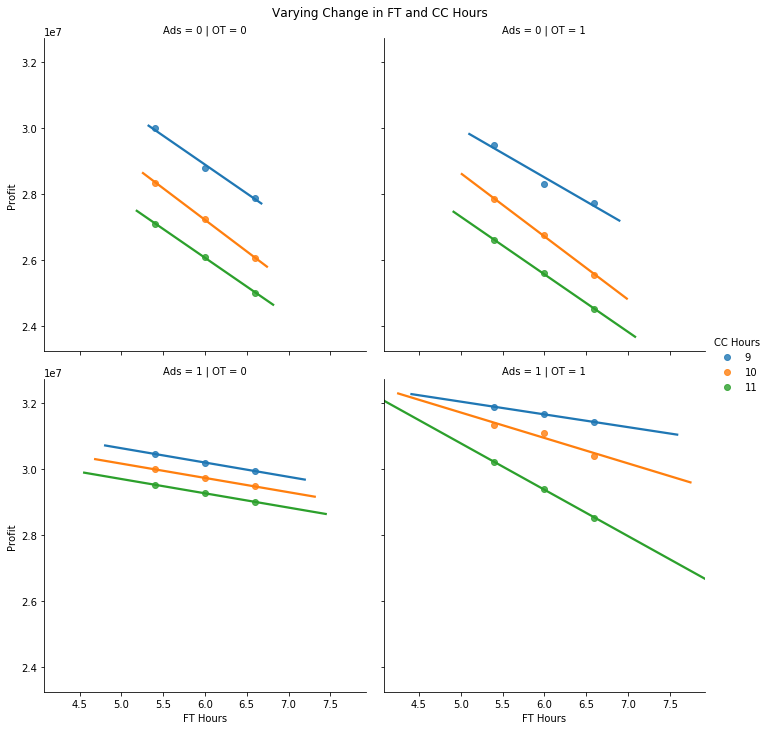

In [73]:
g = sns.lmplot(x='FT Hours', y='Profit', row = 'Ads', col = 'OT', data=obj_df, hue='CC Hours', ci = None)
fig = g.fig
fig.suptitle("Varying Change in FT and CC Hours", y = 1.01)

In [74]:
# Part G
#Conducting Sensitivity Analysis Based on Profit from FF
reported_ff_prof = np.linspace(2800,3600 , num=9)

# Create matrix to store various profit values
obj_df = pd.DataFrame()

for i in range(len(reported_ff_prof)):
    # Define Model
    mdl_g = cpx.Model("SM Profit Maximization")

    #Define Varaibles
    ff_prof = reported_ff_prof[i]
    x1 = mdl_g.integer_var(name = "ft")
    x2 = mdl_g.integer_var(name = "cc", ub = 3500)

    #Define Constraints
    mdl_g.add_constraint(6*x1 + 10.5*x2 <= 48000, ctname = "Labor Hours")
    mdl_g.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

    #Define Objective
    mdl_g.maximize(ff_prof*x1 + 5400*x2)

    #solving the model
    s = mdl_g.solve()
    
    #Save the profit
    obj_df = obj_df.append(pd.DataFrame({'FT Unit Profit': ff_prof,'Profit' : s.get_objective_value()}, index=[0]), ignore_index=True)
    
obj_df = obj_df[['FT Unit Profit', 'Profit']]
(obj_df.style
  .background_gradient(cmap=cm, subset=['Profit'])
  .set_caption('Varying FT Unit Profit')
  .set_table_styles(styles))    

,FT Unit Profit,Profit
0,2800,2.415e+07
1,2900,2.43375e+07
2,3000,2.4525e+07
3,3100,2.474e+07
4,3200,2.512e+07
5,3300,2.55e+07
6,3400,2.588e+07
7,3500,2.626e+07
8,3600,2.664e+07


In [75]:
# Part H
#Conducting Sensitivity Analysis Based on Hours for FF
ff_hours_build = np.linspace(5,7.5 , num=6)

# Create matrix to store various profit values
obj_df = pd.DataFrame()

for i in range(len(ff_hours_build)):
    ff_hours = ff_hours_build[i]
    
    #Define Model
    mdl_h = cpx.Model("SM Profit Maximization")

    #Define Varaibles
    x1 = mdl_h.integer_var(name = "ft")
    x2 = mdl_h.integer_var(name = "cc", ub = 3500)

    #Define Constraints
    mdl_h.add_constraint(ff_hours*x1 + 10.5*x2 <= 48000, ctname = "Labor Hours")
    mdl_h.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

    #Define Objective
    mdl_h.maximize(3600*x1 + 5400*x2)

    #solving the model
    s = mdl_h.solve()
    
    #Save the profit
    obj_df = obj_df.append(pd.DataFrame({'FT Hours': ff_hours,'Profit' : s.get_objective_value()}, index=[0]), ignore_index=True)
    
obj_df = obj_df[['FT Hours', 'Profit']]
(obj_df.style
  .background_gradient(cmap=cm, subset=['Profit'])
  .set_caption('Varying FT Labor Hours')
  .set_table_styles(styles))    

,FT Hours,Profit
0,5,28348200
1,5.5,27520200
2,6,26640000
3,6.5,25695000
4,7,24685200
5,7.5,24300000


In [76]:
# Part I
#Conducting Sensitivity Analysis Based on Company WIllingness to Forgo Profit

potential_loss = np.linspace(1000000, 3000000, num=5)

# Create matrix to store various profit values
obj_df = pd.DataFrame()

for i in range(len(potential_loss)):
    # Define Model
    mdl_i = cpx.Model("SM Profit Maximization")

    #Define Varaibles
    accept_loss = potential_loss[i]
    x1 = mdl_i.integer_var(name = "ft")
    x2 = mdl_i.integer_var(name = "cc", ub = 3500)

    #Define Constraints
    mdl_i.add_constraint(6*x1 + 10.5*x2 <= 48000, ctname = "Labor Hours")
    mdl_i.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")
    mdl_i.add_constraint(x2 == 3500)

    #Define Objective
    mdl_i.maximize(3600*x1 + 5400*x2 - 26640000)

    #solving the model
    s = mdl_i.solve()
    val = s.get_objective_value()
    under = (val < accept_loss)
    if under:
        under = 1
    else:
        under = 0
        
    val = s.get_objective_value() + 26640000
    
    #Save the difference between new and old profit
    obj_df = obj_df.append(pd.DataFrame({'Profit' : s.get_objective_value() + 26640000, 'Acceptable Loss': accept_loss, "Undertake Binary" : under }, index=[0]), ignore_index=True)
    
obj_df = obj_df[['Profit', 'Acceptable Loss', 'Undertake Binary']]
(obj_df.style
  .background_gradient(cmap=cm, subset=['Undertake Binary'])
  .set_caption('Varying Acceptable Loss')
  .set_table_styles(styles))    

,Profit,Acceptable Loss,Undertake Binary
0,25650000,1e+06,1
1,25650000,1.5e+06,1
2,25650000,2e+06,1
3,25650000,2.5e+06,1
4,25650000,3e+06,1


In [87]:
# Part J
#Sensitivity Analysis Varying OT price, FT unit profit, and FT hours required

ot_price = np.linspace(1400000/12000, 1800000/12000, num = 3)
reported_ff_prof = np.linspace(2800,3600 , num=3)
ff_hours_build = np.linspace(6,7.5 , num=4)

# Create matrix to store various profit values
obj_df = pd.DataFrame()

for i in range(len(ot_price)):
    for j in range(len(ff_hours_build)):
        for k in range(len(reported_ff_prof)):
            ot_p = ot_price[i]
            ff_hours = ff_hours_build[j]
            ff_prof = reported_ff_prof[k]
            
            #With Ads, With OT
            # Define Model
            mdl_j = cpx.Model("SM Profit Maximization")

            #Define Varaibles
            x1 = mdl_j.integer_var(name = "ft")
            x2 = mdl_j.integer_var(name = "cc", ub = 3500*1.2)
            x3 = mdl_j.integer_var(name = "ot", ub = 12000 )

            #Define Constraints
            mdl_j.add_constraint(ff_hours*x1 + 10.5*x2 <= 48000 + x3, ctname = "Labor Hours")
            mdl_j.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

            #Define Objective
            mdl_j.maximize(ff_prof*x1 + 5400*x2 - ot_p*x3 -500000)

            #solving the model
            s = mdl_j.solve()
            
            #Save the difference between new and old profit
            obj_df = obj_df.append(pd.DataFrame({'Max OT Price' : int(ot_p*12000), 'FT Profit' : ff_prof, 'FT Hours' : ff_hours, 'Profit' : s.get_objective_value(), 'Ads': 1, 'OT': 1}, index=[0]), ignore_index=True)

            ########################################################################################################################

            #Without Ads, With OT
            # Define Model
            mdl_j = cpx.Model("SM Profit Maximization")

            #Define Varaibles
            x1 = mdl_j.integer_var(name = "ft")
            x2 = mdl_j.integer_var(name = "cc", ub = 3500)
            x3 = mdl_j.integer_var(name = "ot", ub = 12000 )

            #Define Constraints
            mdl_j.add_constraint(ff_hours*x1 + 10.5*x2 <= 48000 + x3, ctname = "Labor Hours")
            mdl_j.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

            #Define Objective
            mdl_j.maximize(ff_prof*x1 + 5400*x2 - ot_p*x3)

            #solving the model
            s = mdl_j.solve()
            
            #Save the difference between new and old profit
            obj_df = obj_df.append(pd.DataFrame({'Max OT Price' : int(ot_p*12000), 'FT Profit' : ff_prof, 'FT Hours' : ff_hours, 'Profit' : s.get_objective_value(), 'Ads': 0, 'OT': 1}, index=[0]), ignore_index=True)
    

            ########################################################################################################################

            #With Ads, Without OT
            # Define Model
            mdl_j = cpx.Model("SM Profit Maximization")

            #Define Varaibles
            x1 = mdl_j.integer_var(name = "ft")
            x2 = mdl_j.integer_var(name = "cc", ub = 3500*1.2)
            x3 = mdl_j.integer_var(name = "ot", ub = 0 )

            #Define Constraints
            mdl_j.add_constraint(ff_hours*x1 + 10.5*x2 <= 48000 + x3, ctname = "Labor Hours")
            mdl_j.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

            #Define Objective
            mdl_j.maximize(ff_prof*x1 + 5400*x2 - ot_p*x3 -500000)

            #solving the model
            s = mdl_j.solve()
            
            #Save the difference between new and old profit
            obj_df = obj_df.append(pd.DataFrame({'Max OT Price' : int(ot_p*12000), 'FT Profit' : ff_prof, 'FT Hours' : ff_hours, 'Profit' : s.get_objective_value(), 'Ads': 1, 'OT': 0}, index=[0]), ignore_index=True)
    

            ########################################################################################################################

            #Without Ads, Without OT
            # Define Model
            mdl_j = cpx.Model("SM Profit Maximization")

            #Define Varaibles
            x1 = mdl_j.integer_var(name = "ft")
            x2 = mdl_j.integer_var(name = "cc", ub = 3500)
            x3 = mdl_j.integer_var(name = "ot", ub = 0)

            #Define Constraints
            mdl_j.add_constraint(ff_hours*x1 + 10.5*x2 <= 48000 + x3, ctname = "Labor Hours")
            mdl_j.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

            #Define Objective
            mdl_j.maximize(ff_prof*x1 + 5400*x2)

            #solving the model
            s = mdl_j.solve()

            #Save the difference between new and old profit
            obj_df = obj_df.append(pd.DataFrame({'Max OT Price' : int(ot_p*12000), 'FT Profit' : ff_prof, 'FT Hours' : ff_hours, 'Profit' : s.get_objective_value(), 'Ads': 0, 'OT': 0}, index=[0]), ignore_index=True, sort = True)
    
obj_df = obj_df[['Max OT Price', 'FT Profit', 'FT Hours', 'Ads', 'OT', 'Profit']]
(obj_df.style
  .background_gradient(cmap=cm, subset=['Profit'])
  .set_caption('Varying Max OT price, FT unit profit, and FT hours required')
  .set_table_styles(styles))    

,Max OT Price,FT Profit,FT Hours,Ads,OT,Profit
0,1400000,2800,6,1,1,2.82e+07
1,1400000,2800,6,0,1,2.70375e+07
2,1400000,2800,6,1,0,2.4e+07
3,1400000,2800,6,0,0,2.415e+07
4,1400000,3200,6,1,1,2.93e+07
5,1400000,3200,6,0,1,2.83375e+07
6,1400000,3200,6,1,0,2.462e+07
7,1400000,3200,6,0,0,2.512e+07
8,1400000,3600,6,1,1,3.05e+07
9,1400000,3600,6,0,1,2.96375e+07


Text(0.5, 1.01, 'Varying OT Price and FT Profit and Hours')

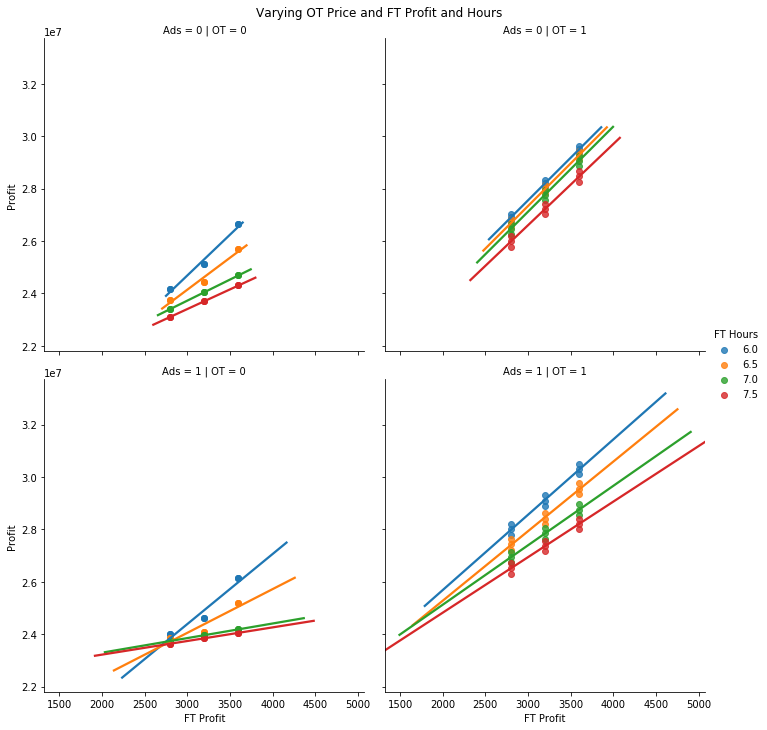

In [91]:
g = sns.lmplot(x='FT Profit', y='Profit', row = 'Ads', col = 'OT', data=obj_df, hue='FT Hours', ci = None)
fig = g.fig
fig.suptitle("Varying OT Price and FT Profit and Hours", y = 1.01)

In [92]:
#Conducting Sensitivity Analysis Based on Unit Profit
ft_prof = [int(3600*.9), 3600, int(3600*1.1)]
cc_prof = [int(5400*.9), 5400, int(5400*1.1)]

# Create matrix to store various profit values
obj_df = pd.DataFrame()

for i in range(3):
    for j in range(3):
        ft_p = ft_prof[i]
        cc_p = cc_prof[j]
        
        # Define Model
        mdl_a = cpx.Model("SM Profit Maximization")

        #Define Varaibles
        x1 = mdl_a.integer_var(name = "ft")
        x2 = mdl_a.integer_var(name = "cc", ub = 3500)

        #Define Constraints
        mdl_a.add_constraint(6*x1 + 10.5*x2 <= 48000, ctname = "Labor Hours")
        mdl_a.add_constraint(4*x1 + 2*x2 <= 20000, ctname = "Doors")

        #Define Objective
        mdl_a.maximize(ft_p*x1 + cc_p*x2)

        #solving the model
        s = mdl_a.solve()
        
        #Save the profit
        obj_df = obj_df.append(pd.DataFrame({'FT Profit': ft_p, 'CC Profit': cc_p, 'Total Profit' : s.get_objective_value()}, index=[0]), ignore_index=True)

obj_df = obj_df[['FT Profit','CC Profit', 'Total Profit']]
(obj_df.style
  .background_gradient(cmap=cm, subset=['Total Profit'])
  .set_caption('Varying Unit Profit for FT and CC')
  .set_table_styles(styles))

,FT Profit,CC Profit,Total Profit
0,3240,4860,23976000
1,3240,5400,25272000
2,3240,5940,26865000
3,3600,4860,25344000
4,3600,5400,26640000
5,3600,5940,27936000
6,3960,4860,26712000
7,3960,5400,28008000
8,3960,5940,29304000


Text(0.5, 1.01, 'Varying Change in FT and CC Profit')

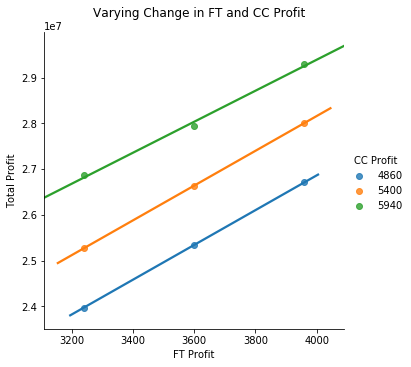

In [93]:
g = sns.lmplot(x='FT Profit', y='Total Profit', data=obj_df, hue='CC Profit', ci = None)
fig = g.fig
fig.suptitle("Varying Change in FT and CC Profit", y = 1.01)